In [38]:
!pip install pyspark
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

     |████████████████████████████████| 281.4 MB 65 kB/s  eta 0:00:01   |██████████▏                     | 89.6 MB 68 kB/s eta 0:46:45     |████████████████▋               | 146.1 MB 1.8 MB/s eta 0:01:16
     |████████████████████████████████| 198 kB 1.9 MB/s eta 0:00:01
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853646 sha256=1027bb95e82d71245b633b5f723c8fff1b267b5db2abfa5102f0440ff906f1bd
  Stored in directory: /Users/lorichiu/Library/Caches/pip/wheels/58/94/83/915c9059e4b038e2d43a6058f307fe1c3e8536e5745f3b23b7
Successfully built pyspark
The operation couldn’t be completed. Unable to locate a Java Runtime.
Please visit http://www.java.com for information on installing Java.



In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [39]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import numpy as np

import multiprocessing as mp
print("Number of processors: ", mp.cpu_count())

Number of processors:  8


In [46]:
def import_file(f):
    
    reviews = pd.DataFrame(columns=['product_title', 'star_rating',
        'helpful_votes', 'total_votes', 'verified_purchase',
        'review_headline', 'review_body', 'category'])
    
    category = re.search('amazon_reviews_us_(.+?)_v1|amazon_reviews_(.+?)_US_v1', f).group(1)
    
    col_list = ['product_title', 'star_rating',
        'helpful_votes', 'total_votes', 'verified_purchase',
        'review_headline', 'review_body']
    df = pd.read_csv("Documents/big-data-s22/ds-5460-project/files/" + str(f), sep='\t', error_bad_lines=False, usecols=col_list)
    
    df['category'] = category
    df = df[df.filter(like='review_').notnull().all(1)]
    df.verified_purchase = df.verified_purchase.eq('Y').mul(1)
    print(f + ": " + str(df.shape))
    reviews = reviews.append(df)
    return(reviews)

In [47]:
num_threads = mp.cpu_count()
pool = mp.Pool(num_threads)

In [42]:
pwd

'/Users/lorichiu'

In [48]:
files = os.listdir('Documents/big-data-s22/ds-5460-project/files/')
r = pool.map(import_file, files)

KeyboardInterrupt: 

In [8]:
df = pd.read_csv("drive/MyDrive/Colab Notebooks/big_data/final_project/amazon_reviews_us_Apparel_v1_00.tsv", sep='\t', error_bad_lines=False)
category = re.search('amazon_reviews_us_(.+?)_v1|amazon_reviews_(.+?)_US_v1', 'amazon_reviews_us_Apparel_v1_00.tsv').group(1)
df['category'] = category

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 49396: expected 15 fields, saw 22\nSkipping line 57008: expected 15 fields, saw 22\n'
b'Skipping line 82075: expected 15 fields, saw 22\nSkipping line 104435: expected 15 fields, saw 22\nSkipping line 109766: expected 15 fields, saw 22\nSkipping line 124024: expected 15 fields, saw 22\nSkipping line 129914: expected 15 fields, saw 22\nSkipping line 130172: expected 15 fields, saw 22\n'
b'Skipping line 161515: expected 15 fields, saw 22\n'
b'Skipping line 230464: expected 15 fields, saw 22\n'
b'Skipping line 292640: expected 15 fields, saw 22\nSkipping line 293681: expected 15 fields, saw 22\nSkipping line 316511: expected 15 fields, saw 22\nSkipping line 317239: expected 15 fields, saw 22\nSkipping line 326099: expected 15 fields, saw 22

In [9]:
df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,category
0,US,32158956,R1KKOXHNI8MSXU,B01KL6O72Y,24485154,Easy Tool Stainless Steel Fruit Pineapple Core...,Apparel,4.0,0.0,0.0,N,Y,★ THESE REALLY DO WORK GREAT WITH SOME TWEAKING ★,"These Really Do Work Great, But You Do Need To...",2013-01-14,Apparel
1,US,2714559,R26SP2OPDK4HT7,B01ID3ZS5W,363128556,V28 Women Cowl Neck Knit Stretchable Elasticit...,Apparel,5.0,1.0,2.0,N,Y,Favorite for winter. Very warm!,I love this dress. Absolute favorite for winte...,2014-03-04,Apparel
2,US,12608825,RWQEDYAX373I1,B01I497BGY,811958549,James Fiallo Men's 12-Pairs Low Cut Athletic S...,Apparel,5.0,0.0,0.0,N,Y,Great Socks for the money.,"Nice socks, great colors, just enough support ...",2015-07-12,Apparel
3,US,25482800,R231YI7R4GPF6J,B01HDXFZK6,692205728,Belfry Gangster 100% Wool Stain-Resistant Crus...,Apparel,5.0,0.0,0.0,N,Y,Slick hat!,"I bought this for my husband and WOW, this is ...",2015-06-03,Apparel
4,US,9310286,R3KO3W45DD0L1K,B01G6MBEBY,431150422,JAEDEN Women's Beaded Spaghetti Straps Sexy Lo...,Apparel,5.0,0.0,0.0,N,Y,I would do it again!,Perfect dress and the customer service was awe...,2015-06-12,Apparel


In [10]:
# get datatypes and number of rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5881874 entries, 0 to 5881873
Data columns (total 16 columns):
 #   Column             Dtype  
---  ------             -----  
 0   marketplace        object 
 1   customer_id        int64  
 2   review_id          object 
 3   product_id         object 
 4   product_parent     int64  
 5   product_title      object 
 6   product_category   object 
 7   star_rating        float64
 8   helpful_votes      float64
 9   total_votes        float64
 10  vine               object 
 11  verified_purchase  object 
 12  review_headline    object 
 13  review_body        object 
 14  review_date        object 
 15  category           object 
dtypes: float64(3), int64(2), object(11)
memory usage: 718.0+ MB


In [11]:
# missing values in each column of dataframe
df.isna().sum()

marketplace            0
customer_id            0
review_id              0
product_id             0
product_parent         0
product_title         12
product_category       0
star_rating            1
helpful_votes          1
total_votes            1
vine                   1
verified_purchase      1
review_headline       56
review_body          785
review_date          109
category               0
dtype: int64

Since we are making predictions based on review body, we want to remove rows that do not have a review body. As we can see, there are less missing values for review headlines than review body, we are making the assumption that all review body texts have a review headline. We are moving rows with missing values for either headline or body.

In [12]:
# get unique values of marketplace
df['marketplace'].unique()

array(['US'], dtype=object)

All reviews are for the US marketplace, so the marketplace column was dropped since it does not affect our modeling.

<BarContainer object of 6 artists>

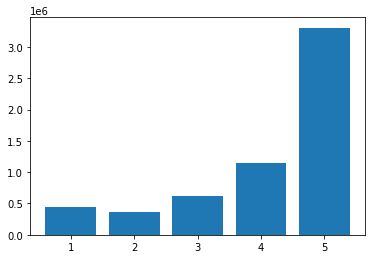

In [13]:
# get distribution of star rating
labels, counts = np.unique(df['star_rating'], return_counts=True)
plt.bar(labels, counts, align='center')

It is not surprising to see that there is large number of reviews with 5 star ratings, since we assume people will leave reviews when they have a really positive or negative experience.

In [14]:
# select distinct product category
df.groupby('product_category').count()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,category
product_category,,,,,,,,,,,,,,,
2011-08-04,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1
Apparel,5881873,5881873,5881873,5881873,5881873,5881861,5881873,5881873,5881873,5881873,5881873,5881818,5881089,5881765,5881873


The product category includes a row that has category has a date. To ensure consistency and accuracy of the categories across all files, we will drop product category column and create our own category by parsing the csv title.

<BarContainer object of 1 artists>

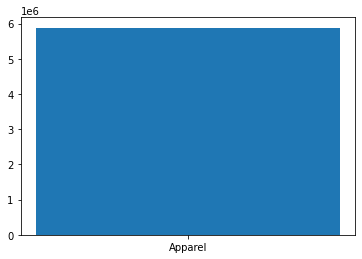

In [15]:
# get distribution of self-defined category
labels, counts = np.unique(df['category'], return_counts=True)
plt.bar(labels, counts, align='center')

In [16]:
# see if there are duplicate rows
df[df.duplicated() == True]


,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,category


No duplicate rows. Good.

In [17]:
# get counts for verified purchase Y or N
df['verified_purchase'].value_counts()

Y    5290304
N     591569
Name: verified_purchase, dtype: int64

We will need to one hot encode this feature.

In [18]:
# get summary stats for total votes
df['total_votes'].describe()

count    5.881873e+06
mean     1.165795e+00
std      2.125568e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      4.188900e+04
Name: total_votes, dtype: float64

In [19]:
# get summary stats for helpful votes
df['helpful_votes'].describe()

count    5.881873e+06
mean     9.742111e-01
std      2.071668e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.127800e+04
Name: helpful_votes, dtype: float64

In [20]:
df.dropna(subset = ['verified_purchase'], inplace=True)

In [21]:
from sklearn.preprocessing import OneHotEncoder

#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'team' column 
encoder_df = pd.DataFrame(encoder.fit_transform(df[['verified_purchase']]).toarray())

#merge one-hot encoded columns back with original DataFrame
final_df = df.join(encoder_df)

In [22]:
final_df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,category,0,1
0,US,32158956,R1KKOXHNI8MSXU,B01KL6O72Y,24485154,Easy Tool Stainless Steel Fruit Pineapple Core...,Apparel,4.0,0.0,0.0,N,Y,★ THESE REALLY DO WORK GREAT WITH SOME TWEAKING ★,"These Really Do Work Great, But You Do Need To...",2013-01-14,Apparel,0.0,1.0
1,US,2714559,R26SP2OPDK4HT7,B01ID3ZS5W,363128556,V28 Women Cowl Neck Knit Stretchable Elasticit...,Apparel,5.0,1.0,2.0,N,Y,Favorite for winter. Very warm!,I love this dress. Absolute favorite for winte...,2014-03-04,Apparel,0.0,1.0
2,US,12608825,RWQEDYAX373I1,B01I497BGY,811958549,James Fiallo Men's 12-Pairs Low Cut Athletic S...,Apparel,5.0,0.0,0.0,N,Y,Great Socks for the money.,"Nice socks, great colors, just enough support ...",2015-07-12,Apparel,0.0,1.0
3,US,25482800,R231YI7R4GPF6J,B01HDXFZK6,692205728,Belfry Gangster 100% Wool Stain-Resistant Crus...,Apparel,5.0,0.0,0.0,N,Y,Slick hat!,"I bought this for my husband and WOW, this is ...",2015-06-03,Apparel,0.0,1.0
4,US,9310286,R3KO3W45DD0L1K,B01G6MBEBY,431150422,JAEDEN Women's Beaded Spaghetti Straps Sexy Lo...,Apparel,5.0,0.0,0.0,N,Y,I would do it again!,Perfect dress and the customer service was awe...,2015-06-12,Apparel,0.0,1.0


In [23]:
# rename one hot encoded columns
final_df.rename(columns={0:'verified_purchase_no', 1:'verified_purchase_yes'}, inplace=True)

In [25]:
# get the month of the review date
final_df['month'] = pd.DatetimeIndex(final_df['review_date']).month

In [26]:
# find correlation between helpful votes and star rating
final_df.corr().style.background_gradient(cmap='coolwarm')

,customer_id,product_parent,star_rating,helpful_votes,total_votes,verified_purchase_no,verified_purchase_yes,month
customer_id,1.000000,-0.000579,0.008182,0.007350,0.007526,0.007629,-0.007629,0.006018
product_parent,-0.000579,1.000000,0.000431,0.000855,0.000870,-0.000244,0.000244,0.000224
star_rating,0.008182,0.000431,1.000000,-0.007933,-0.012966,-0.026853,0.026853,-0.005031
helpful_votes,0.007350,0.000855,-0.007933,1.000000,0.998811,0.012154,-0.012154,0.001747
total_votes,0.007526,0.000870,-0.012966,0.998811,1.000000,0.014372,-0.014372,0.002172
verified_purchase_no,0.007629,-0.000244,-0.026853,0.012154,0.014372,1.000000,-1.000000,0.083785
verified_purchase_yes,-0.007629,0.000244,0.026853,-0.012154,-0.014372,-1.000000,1.000000,-0.083785
month,0.006018,0.000224,-0.005031,0.001747,0.002172,0.083785,-0.083785,1.000000


<BarContainer object of 13 artists>

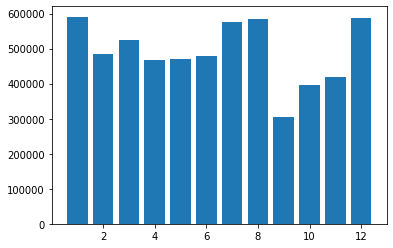

In [27]:
# get distribution of reviews by month
labels, counts = np.unique(final_df['month'], return_counts=True)
plt.bar(labels, counts, align='center')

There aren't any trends by review month.

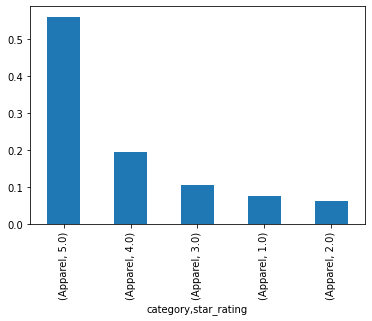

In [30]:
# show distribution of the star rating by product category
final_df['star_rating'].groupby(final_df['category']).value_counts(sort=True,normalize=True).plot.bar()

In [32]:
final_df.groupby('category').mean('star_rating')

,customer_id,product_parent,star_rating,helpful_votes,total_votes,verified_purchase_no,verified_purchase_yes,month
category,,,,,,,,
Apparel,2.538800e+07,5.029080e+08,4.105261,0.974211,1.165795,0.100575,0.899425,6.336342


In [23]:
# col_list = ['product_title', 'star_rating',
#        'helpful_votes', 'total_votes', 'verified_purchase',
#        'review_headline', 'review_body']
# reviews = pd.DataFrame(columns=['product_title', 'star_rating',
#        'helpful_votes', 'total_votes', 'verified_purchase',
#        'review_headline', 'review_body', 'category'])
# file = "amazon_reviews_us_Apparel_v1_00.tsv"
# df = pd.read_csv("drive/MyDrive/Colab Notebooks/big_data/final_project/amazon_reviews_us_Apparel_v1_00.tsv", sep='\t', error_bad_lines=False, usecols=col_list)
# category = re.search('amazon_reviews_us_(.+?)_v1|amazon_reviews_(.+?)_US_v1', file).group(1)
# df['category'] = category

In [ ]:
files = ['multilingual',
'Apparel',
'Automotive',
'Baby',
'Beauty',
'Books',
'Camera',
'Digital_Ebook_Purchase',
'Digital_Music_Purchase',
'Digital_Software',
'Digital_Video_Download',
'Digital_Video_Games',
'Electronics',
'Furniture',
'Gift_Card',
'Grocery',
'Health_Personal_Care',
'Major_Appliances',
'Mobile_Apps',
'Mobile_Electronics',
'Music',
'Musical_Instruments',
'Office_Products',
'Outdoors',
'PC',
'Personal_Care_Appliances',
'Pet_Products',
'Shoes',
'Software',
'Sports',
'Tools',
'Toys',
'Video_DVD',
'Video_Games',
'Video',
'Watches',
'Wireless']